## High Frequency Words
### Group: Abdelmalek Hajjam, Monu Chacko


### Natural Language Processing (NLP) provides an ability to analyse unstructured data stored in text format. The data can be stored in various forms including websites. In this exercise we will try to analyse and try to find out what is in the minds of people when it comes to politics. 

### The best place to start is by analysing a popular site realclearpolitics.com. We will extract data and analyse the trends in our political landscape. This is a realtime data analysis. 

In [1]:
from bs4 import BeautifulSoup
import urllib.request 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk import FreqDist
%matplotlib inline

In [2]:
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

Let load data from the website realclearpolitics.com using a popular package BeautifulSoup. We remove the script and style tags.

In [3]:
response = urllib.request.urlopen('https://www.realclearpolitics.com/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

for script in soup(["script", "style"]): 
    # remove all javascript and stylesheet code
    script.extract()

text = soup.get_text(strip=True).lower()


View the sample data from the website

In [12]:
' '.join(text.split()[:100])

"realclearpolitics - live opinion, news, analysis, video and pollslatest newshomeelection 2020monday, october 21sunday, october 20saturday, october 19friday, october 18thursday, october 17wednesday, october 16tuesday, october 15monday, october 14set this view as default?yesnoset this view as default?yesnomike pompeo on syria, china and playing the long gamezev chafets, bloombergtrump's fifth avenue theory is showing some crackse.j. dionne, washington postwhy washington d.c. compulsively lies about trumpmark hemingway, federalistnow is not the time for democrats to panic about 2020joel mathis, the weekdoes warren have a plan to walk back unpopular positions?albert hunt, the hillhow congress can fix high drug pricessens. grassley & cramer, washington examinerthe"

Here we will use word tokenizer to extract words and then remove numbers, remove stopwords and custom stopwords, remove single characters. We will use lemmatization to process words. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Here is also an example of stemming using porter stem.

In [4]:
wt = word_tokenize(text)
sw = stopwords.words('english')
csw = ['function', 'var', 'is', 'you', 'said', 'next', 'read', 'still', 'will', 'say']

fs = [word for word in wt if word.isalpha()]
fs = [word for word in fs if not word in sw]
fs = [word for word in fs if len(word) > 1]
fs = [word for word in fs if not word in csw]
fs = [lemmatizer.lemmatize(word) for word in fs]
fs = [porter.stem(word) for word in fs]

In [18]:
freq = nltk.FreqDist(fs)
print("Total Number of Unique words: " + str(len(freq)))

Total Number of Unique words: 808


List of most common 200 words

In [13]:
print(freq.most_common(200))

[('trump', 25), ('democrat', 13), ('york', 12), ('new', 11), ('warren', 10), ('china', 9), ('ukrain', 9), ('octob', 8), ('syria', 8), ('washington', 8), ('biden', 7), ('donald', 7), ('american', 7), ('presid', 7), ('plan', 6), ('dem', 6), ('make', 6), ('sander', 6), ('push', 6), ('polit', 6), ('walk', 5), ('meet', 5), ('troop', 5), ('offer', 5), ('morn', 5), ('school', 5), ('ralli', 5), ('campaign', 5), ('court', 5), ('news', 4), ('time', 4), ('back', 4), ('state', 4), ('hollywood', 4), ('foreign', 4), ('mitt', 4), ('hold', 4), ('grill', 4), ('mulvaney', 4), ('resign', 4), ('like', 4), ('could', 4), ('even', 4), ('help', 4), ('turn', 4), ('immigr', 4), ('parent', 4), ('full', 4), ('republican', 4), ('impeach', 4), ('moreth', 4), ('moremor', 4), ('health', 4), ('mad', 4), ('pompeo', 3), ('long', 3), ('fifth', 3), ('avenu', 3), ('theori', 3), ('show', 3), ('posit', 3), ('econom', 3), ('find', 3), ('clint', 3), ('eastwood', 3), ('christian', 3), ('cum', 3), ('mean', 3), ('get', 3), ('twit

Let's visualize it in a chart

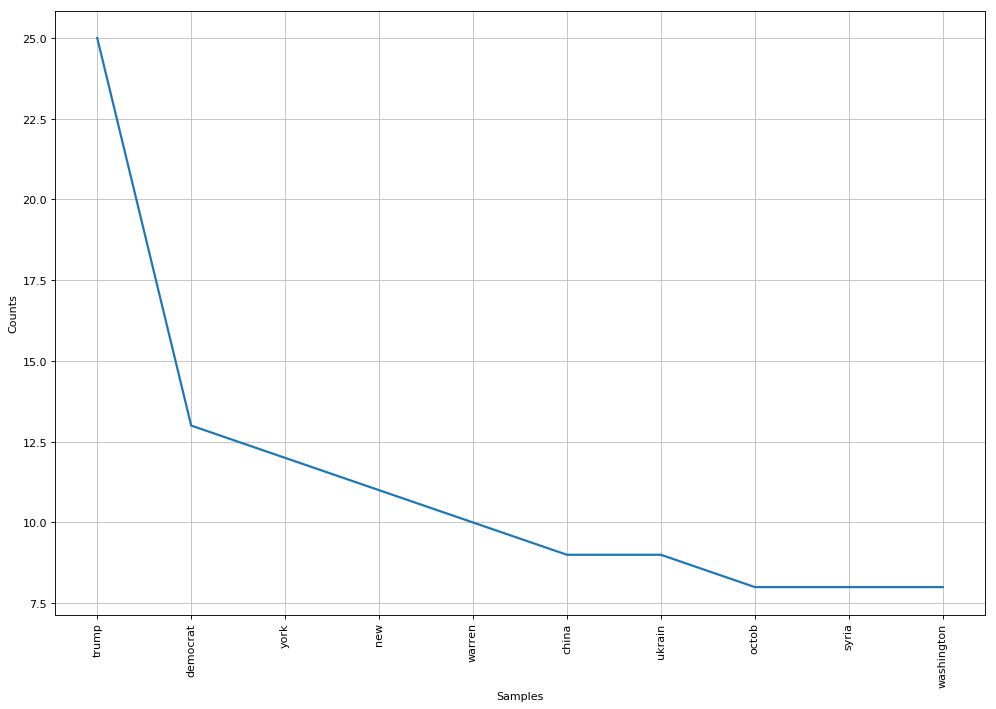

In [6]:
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
freq.plot(10,cumulative=False)

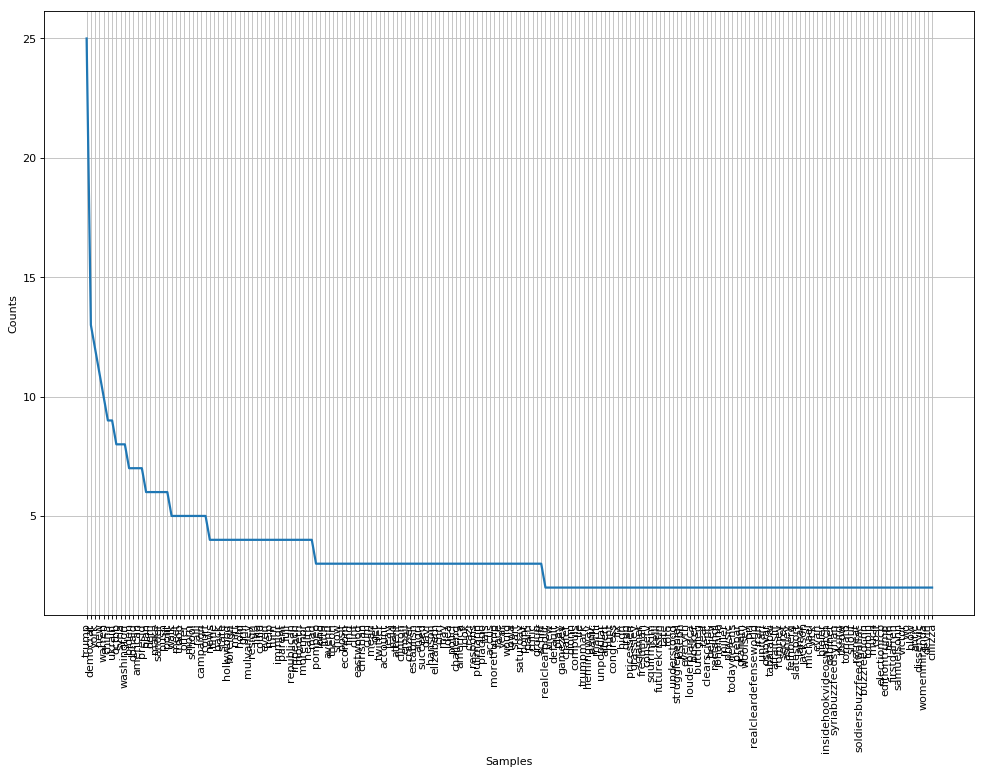

In [7]:
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
freq.plot(200,cumulative=False)

The word cloud shows us whats in the mind of people when it comes to politics. The website shows trending topics in politics and we can use NLP to find trends. These are the topics we see in our news cycles everyday. 

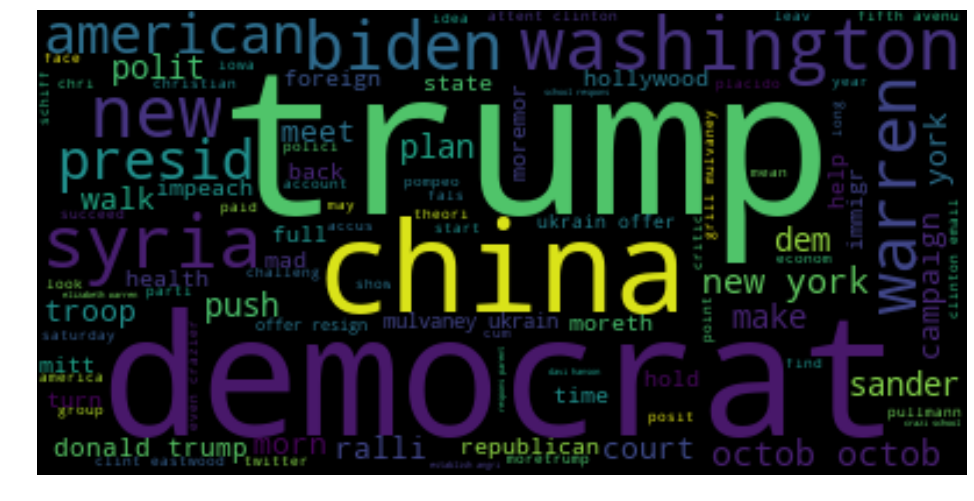

In [8]:
wordcloud = WordCloud().generate(' '.join(fs))
# Display the generated image:

fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()